data setting

In [1]:
%matplotlib inline
from scipy import sparse
from sklearn.model_selection import *
from sklearn.model_selection import validation_curve
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.tree import DecisionTreeClassifier
# import xgboost

In [2]:
X = pd.read_csv('edited_train.csv')

In [3]:
x = pd.merge(pd.read_csv('Musthave_by_FinelineNumber.csv'), 
                 pd.read_csv('Musthave_by_company_code.csv'), on='VisitNumber')
x = pd.merge(x, pd.read_csv('Musthave_by_product_code.csv'), on='VisitNumber')
x = pd.merge(pd.read_csv('DD.csv'), x, on='VisitNumber')
X = pd.merge(X, x, on='VisitNumber')

---

In [3]:
dd = pd.read_csv('DD.csv')
x1 = pd.read_csv('Musthave_by_FinelineNumber.csv')
# x2 = pd.read_csv('Musthave_by_DepartmentDescription.csv.csv')
x3 = pd.read_csv('Musthave_by_company_code.csv')
x4 = pd.read_csv('Musthave_by_product_code.csv')

x = pd.merge(x1, x3, on='VisitNumber')
x = pd.merge(x, x4, on='VisitNumber')
x = pd.merge(dd, x, on='VisitNumber')
X = pd.merge(X, x, on='VisitNumber')

In [5]:
# X = pd.merge(X, x1, on='VisitNumber')
# X = pd.merge(X, dd, on='VisitNumber')

In [4]:
y = X['TripType']
X = X.drop('TripType', axis=1)

In [5]:
X = sparse.csr_matrix(X)

In [6]:
gx = X[:50000]
gy = y[:50000]

---

In [6]:
Eforest = ExtraTreesClassifier(max_depth=30, n_estimators=200, warm_start=True, n_jobs=-1)

In [8]:
%time cross_val_score(Eforest, gx, gy, scoring="accuracy", cv=5).mean()

/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


CPU times: user 1h 38min 24s, sys: 19.7 s, total: 1h 38min 44s
Wall time: 27min 55s


0.7349786220247166

In [ ]:
%time Eforest.fit(X, y)

In [9]:
import pickle

with open('model.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Eforest, f, pickle.HIGHEST_PROTOCOL)

In [8]:
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)

In [10]:
test = pd.read_csv('edited_test.csv')
t_visit=test['VisitNumber']

T_dd = pd.read_csv('T_DD.csv')
t1 = pd.read_csv('T_Musthave_by_FinelineNumber.csv')
t3 = pd.read_csv('T_Musthave_by_company_code.csv')
t4 = pd.read_csv('T_Musthave_by_product_code.csv')

In [11]:
t = pd.merge(t1, t3, on='VisitNumber')
t = pd.merge(t, t4, on='VisitNumber')
t = pd.merge(T_dd, t, on='VisitNumber')
test = pd.merge(test, t, on='VisitNumber')

In [ ]:
ans = pd.DataFrame(data = forest.predict_proba(test),
                   columns=list(map(lambda x: 'TripType_{}'.format(x), forest.classes_.astype(str))))
ans = pd.concat([t_visit, ans], axis=1)

ans.to_csv('ans.csv', index=False)


---

In [7]:
Eforest = ExtraTreesClassifier(max_depth=30, n_estimators=200, warm_start=True, n_jobs=-1)
%time Eforest.fit(gx, gy)

CPU times: user 2min 22s, sys: 789 ms, total: 2min 23s
Wall time: 43.2 s


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=30, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=True)

everything

In [8]:
%time cross_val_score(Eforest, gx, gy, scoring="accuracy", cv=5).mean()

/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


CPU times: user 8min 6s, sys: 1.59 s, total: 8min 8s
Wall time: 2min 8s


0.6689667059486677

only DD + Fineline

In [9]:
cross_val_score(Eforest, gx, gy, scoring="accuracy", cv=5).mean()

/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.6297782526810394

---

ada

In [8]:
#make model
DT = DecisionTreeClassifier(max_depth=2, random_state=0)

ada = AdaBoostClassifier(DT, 
                               algorithm="SAMME", n_estimators=100, learning_rate=1.0)

# range setting
estimator_range = np.logspace(0,2.4, 5, dtype=int)
learning_rate_range = np.logspace(-3, 0, 10)
# DT_range = 
# base = Pipeline([('clf', DecisionTreeClassifier(random_state=0))])

# grid setting
param_grid ={
    'n_estimators': estimator_range,
     'learning_rate': learning_rate_range, 
}

In [9]:
param_range=estimator_range
%time train_scores, test_scores = \
    validation_curve(ada, X, y, 
                     param_name="n_estimators", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=-1)

/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


CPU times: user 5.11 s, sys: 584 ms, total: 5.69 s
Wall time: 14min 36s


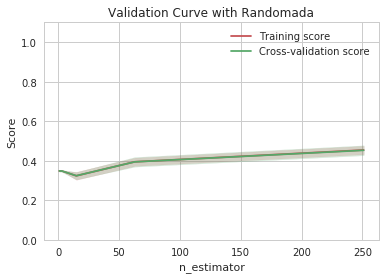

In [10]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with Randomada")
plt.xlabel("n_estimator")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

learning_rate

In [8]:
%%time
param_range=learning_rate_range
train_scores, test_scores = \
    validation_curve(ada, X, y, 
                     param_name="learning_rate", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=-1)

/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


CPU times: user 6.23 s, sys: 990 ms, total: 7.21 s
Wall time: 25min 54s


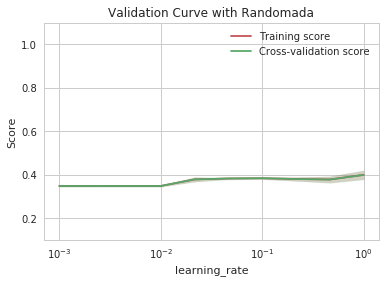

In [14]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with Randomada")
plt.xlabel("learning_rate")
plt.ylabel("Score")
plt.ylim(0.1, 1.1)
plt.show()

gridsearch

In [ ]:
# matke GS
gs = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1
                 ,return_train_score=True)
%time gs = gs.fit(X, y)

In [ ]:
print("best_params", gs.best_params_)
print("best_score", gs.best_score_)

In [ ]:
train_scores_mean =gs.cv_results_['mean_train_score']
train_scores_std = gs.cv_results_['std_train_score']
test_scores_mean = gs.cv_results_['mean_test_score']
test_scores_std = gs.cv_results_['std_test_score']

param_range = range(len(train_scores_mean)) # 사이즈에 맞게 range 변경

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with RandomForest")
plt.xlabel("testing")
plt.ylabel("Score")
plt.ylim(0.9, 1.1)
plt.show()

---

## XGboost
- estimator_range
- learning_rate
- depth_range

google - colab이용...

In [15]:
#make model
params = { "n_estimators": 10, 'max_depth':2, 'tree_method':['gpu_hist'], 'predictor':['gpu_predictor'] }
xgb = xgboost.XGBClassifier(**params)

# range setting
estimator_range = np.logspace(0, 2.4, 5, dtype=int)
depth_range = np.linspace(1,30,10, dtype=int)
learning_rate_range = np.logspace(-3, -1, 5)
# grid setting
param_grid = {
    'n_estimators': estimator_range,
    'max_depth': depth_range,
    'learning_rate': learning_rate_range,
}

In [ ]:
%%time
param_range=depth_range
train_scores, test_scores = \
    validation_curve(xgb, X, y, 
                     param_name="max_depth", param_range=param_range,
                     cv=5, scoring="accuracy", n_jobs=-1)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with xgb")
plt.xlabel("depth")
plt.ylabel("Score")
plt.ylim(0.9, 1.05)
plt.show()

---

### ExtraTrees

In [6]:
np.logspace(1, 2.7, 5, dtype=int)

array([ 10,  26,  70, 188, 501])

In [28]:
np.logspace(0, 2, 5, dtype=int)

array([  1,   3,  10,  31, 100])

In [9]:
forest = ExtraTreesClassifier(max_depth=30, warm_start=True, n_jobs=-1)
# range setting
estimator_range = np.logspace(1, 2.7, 5, dtype=int)
depth_range = np.logspace(0,2,5, dtype=int)
# grid setting
param_grid = {
    'n_estimators': estimator_range,
    'max_features': ['auto', 'log2'],
    'max_depth': depth_range
}


In [14]:
param_range=depth_range
%time train_scores, test_scores = \
    validation_curve(forest, X, y, \
                     param_name="max_depth", param_range=param_range, \
                     cv=10, scoring="accuracy", n_jobs=-1)

/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


CPU times: user 3.94 s, sys: 299 ms, total: 4.24 s
Wall time: 7min 9s


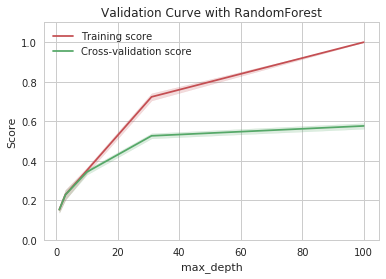

In [15]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with RandomForest")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

30 정도가 적당한 듯

In [10]:
%%time
param_range=estimator_range
train_scores, test_scores = \
    validation_curve(forest, gx, gy, 
                     param_name="n_estimators", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=-1)

/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


CPU times: user 789 ms, sys: 170 ms, total: 959 ms
Wall time: 5min 53s


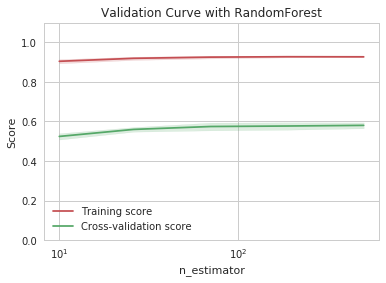

In [11]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with RandomForest")
plt.xlabel("n_estimator")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

---

In [4]:
forest = ExtraTreesClassifier()
# range setting
estimator_range = np.logspace(1, 3, 5, dtype=int)
depth_range = np.logspace(0,2,5, dtype=int)
# grid setting
param_grid = {
    'n_estimators': estimator_range,
    'max_features': ['auto', 'log2'],
    'max_depth': depth_range
}


In [8]:
# matke GS
gs = GridSearchCV(estimator=forest, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1
                 ,return_train_score=True)
%time gs = gs.fit(X, y)

/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


CPU times: user 1min 27s, sys: 1.02 s, total: 1min 28s
Wall time: 18min 24s


만개(visitnumber 기준) 돌리는데 18분...

In [9]:
print("best_params", gs.best_params_)
print("best_score", gs.best_score_)

best_params {'max_depth': 19, 'max_features': 'auto', 'n_estimators': 85}
best_score 0.5281894767648473


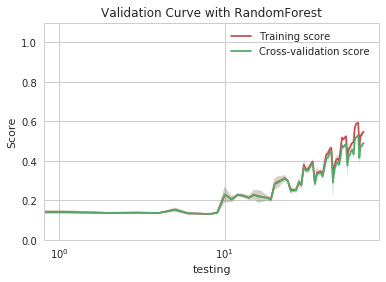

In [11]:
train_scores_mean =gs.cv_results_['mean_train_score']
train_scores_std = gs.cv_results_['std_train_score']
test_scores_mean = gs.cv_results_['mean_test_score']
test_scores_std = gs.cv_results_['std_test_score']

param_range = range(len(train_scores_mean)) # 사이즈에 맞게 range 변경

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with RandomForest")
plt.xlabel("testing")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

---